# AIRCRAFT ACCIDENTS ANALYSIS  

## Introduction
The company I work for is expanding into new industries to diversify its portfolio, and I have been tasked with determinig which aircraft has the lowest risk, to help facilitate the start of this new business endeavor. We are specifically interested in purchasing and operating airplanes for commercial and private enterprises.


## Objectives
- Identify low-risk aircraft for the new aviation division.
- Yield three business recommendations from the low-risk aircraft findings.


## Business Problem

The questions I am seeking to understand are:

1. What trends and patterns are there in aircraft accidents to date?

2. Which aircraft makes(models) are most commonly involved in the accidents?

3. Which aircraft models are least likely to sustain damage?

4. Does the weather condition play a significant role in causing aircraft accidents?


## Data Understanding
I will be working with a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It is from Kaggle (https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses).

My aim is to gain an understabding into the factors that cause accidents to be able to make recommendations on aircrafts associated with lowest risk.


The data is contained in `Aviation_Data.csv` and each record represents an accident incident, with details of its occurrence.

## 1. Importing Standard Packages

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Loading the dataset

In the celll below, load `Aviation_Data.csv` as `df`.

In [32]:
file_path = "data\Aviation_Data.csv"
aviation_df = pd.read_csv(file_path)
aviation_df

C:\Users\sharo\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## 3. Understanding what we have in the dataset

Lets understand the structure and contents of this dataset

In [33]:
# to display information about the dataset
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Next we check to see the statistical summary of the numeric columns


In [34]:
# Summary statistics
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [35]:
# Missing values
aviation_df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [36]:
# Columns of the dataframe
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## 4. Handling missing data

First we will check for missing values then decide on how to deal with them. Missing values can be dropped, replaced or kept, but with a place value

In [37]:
# Check for missing values in each column
missing_values = aviation_df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(aviation_df)) * 100

# Combine into a DataFrame for clarity
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values(by='Percentage', ascending=False, inplace=True)

print(missing_data)

                        Missing Values  Percentage
Schedule                         77766   86.073848
Air.carrier                      73700   81.573471
FAR.Description                  58325   64.555939
Aircraft.Category                58061   64.263736
Longitude                        55975   61.954886
Latitude                         55966   61.944924
Airport.Code                     40099   44.382831
Airport.Name                     37558   41.570372
Broad.phase.of.flight            28624   31.681941
Publication.Date                 16689   18.471909
Total.Serious.Injuries           13969   15.461327
Total.Minor.Injuries             13392   14.822686
Total.Fatal.Injuries             12860   14.233851
Engine.Type                       8536    9.447913
Report.Status                     7840    8.677558
Purpose.of.flight                 7651    8.468367
Number.of.Engines                 7543    8.348829
Total.Uninjured                   7371    8.158454
Weather.Condition              

Next we'll drop columns that  missing values are more than 50% of the values and rows that have more than 80% missing.

In [38]:
# define the threshold
threshold = len(aviation_df)*0.5
    
#Drop Columns with more than 50% missing values
aviation_df  = aviation_df.dropna(axis=1, thresh=threshold)
print(aviation_df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')


In [39]:
# Drop rows with too many missing values
aviation_df = aviation_df.dropna(thresh=len(aviation_df.columns) * 0.8)
aviation_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,KLWT,Lewiston Municipal Airport,Non-Fatal,Substantial,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,Substantial,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,BKV,BROOKSVILLE-TAMPA BAY RGNL,Minor,Substantial,...,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


In [40]:
# Checking to see which columns have been cleaned.
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     22
Country                     213
Airport.Code              33624
Airport.Name              31028
Injury.Severity              71
Aircraft.damage            1745
Registration.Number         207
Make                         11
Model                        29
Amateur.Built                10
Number.of.Engines          2061
Engine.Type                2607
Purpose.of.flight          2325
Total.Fatal.Injuries      10280
Total.Serious.Injuries    11022
Total.Minor.Injuries      10314
Total.Uninjured            4854
Weather.Condition           695
Broad.phase.of.flight     22104
Report.Status              2888
Publication.Date          14022
dtype: int64

Fill in missing values in categorical variables using the mode.

In [41]:
# Fill missing values in all categorical columns with their mode
categorical_columns = [
    "Injury.Severity",
    "Aircraft.damage",
    "Make",
    "Model",
    "Broad.phase.of.flight",
    "Weather.Condition",
    "Purpose.of.flight",
    "Engine.Type",
    "Location",
    "Country",
    "Airport.Code",
    "Airport.Name",
    "Registration.Number",
    "Report.Status",
    "Amateur.Built"
]

for column in categorical_columns:
    aviation_df[column].fillna(aviation_df[column].mode()[0], inplace=True)

In [42]:
# Verify there is no missing values in categorical columns
print(aviation_df[categorical_columns].isnull().sum())

Injury.Severity          0
Aircraft.damage          0
Make                     0
Model                    0
Broad.phase.of.flight    0
Weather.Condition        0
Purpose.of.flight        0
Engine.Type              0
Location                 0
Country                  0
Airport.Code             0
Airport.Name             0
Registration.Number      0
Report.Status            0
Amateur.Built            0
dtype: int64


In [43]:
# Next we will clean the numeric columns.
numeric_columns = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines',
]

# Fill missing values in numeric columns with the mean of each column
for column in numeric_columns:
    aviation_df[column].fillna(aviation_df[column].mean(), inplace=True)

In [44]:
# Verifying that no missing values remain
print(aviation_df[numeric_columns].isnull().sum())

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Number.of.Engines         0
dtype: int64


Lets now check the data types of the columns to ensure numeric ones are either floats or int and categorical ones are strings. The numeric ones being floats or integers is the most important aspect here.

In [45]:
# Check data types
print(aviation_df.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object


In [46]:
aviation_df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NONE,Private,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.000000,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NONE,Private,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.000000,0.000000,0.000000,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NONE,Private,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,0.264018,0.344855,4.399987,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NONE,Private,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.000000,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NONE,Private,Fatal(1),Destroyed,...,Reciprocating,Personal,1.0,2.000000,0.344855,0.000000,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,KLWT,Lewiston Municipal Airport,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.000000,0.000000,1.000000,VMC,Landing,Probable Cause,14-12-2022
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.000000,0.000000,1.000000,VMC,Landing,Probable Cause,27-12-2022
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.000000,0.000000,1.000000,VMC,Landing,Probable Cause,19-12-2022
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,BKV,BROOKSVILLE-TAMPA BAY RGNL,Minor,Substantial,...,Reciprocating,Personal,0.0,1.000000,0.000000,0.000000,VMC,Landing,Probable Cause,23-12-2022


In [47]:
# Fill missing values in Publication.Date column with 'Not Published'.

aviation_df['Publication.Date'].fillna(aviation_df['Publication.Date'].mode()[0], 
                                       inplace=True)
aviation_df['Publication.Date'].fillna('Not Published', inplace=True)
aviation_df['Publication.Date'] = pd.to_datetime(aviation_df['Publication.Date'], errors='coerce')

In [48]:
print(aviation_df.isnull().sum())

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


In [49]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83339 entries, 0 to 90345
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                83339 non-null  object        
 1   Investigation.Type      83339 non-null  object        
 2   Accident.Number         83339 non-null  object        
 3   Event.Date              83339 non-null  object        
 4   Location                83339 non-null  object        
 5   Country                 83339 non-null  object        
 6   Airport.Code            83339 non-null  object        
 7   Airport.Name            83339 non-null  object        
 8   Injury.Severity         83339 non-null  object        
 9   Aircraft.damage         83339 non-null  object        
 10  Registration.Number     83339 non-null  object        
 11  Make                    83339 non-null  object        
 12  Model                   83339 non-null  object

# EXPLORATORY DATA ANALYSIS

I will now perform some Exploratory Data Aanalysis to be able to understand the data better and uncover patterns and relationships.

  ## 1. Accident trend over the years
  
  Let's investigate the accident trend over the years.

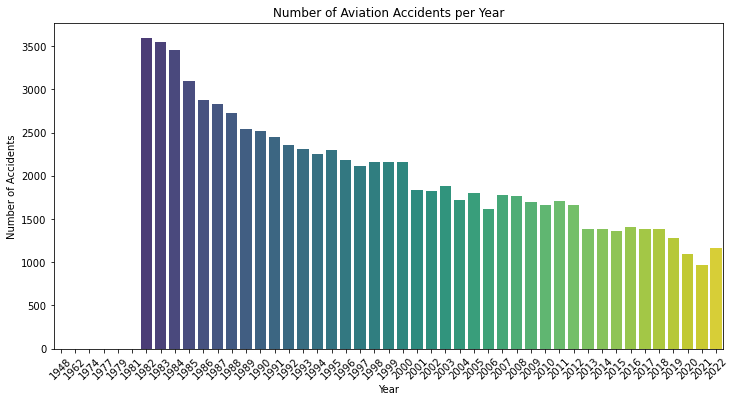

In [50]:
# Convert 'Event.Date' to datetime
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], errors='coerce')

# Extract the 'Year' from the 'Event.Date'
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

# Plot number of accidents per year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=aviation_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show();

### FINDINGS.

The number of accidents is generally decreasing as the years go by.

The dataset seems to be missing information for the years 1962 to sometime in 1981.

1982 had the highest number of accidents.

## 2. Accident Counts by Aircraft Make

 Here I am seeking to understand which aircraft Makes(models) are most commonly involved in the accidents.
 
 First, let's find out the unique values of the `'Make'` column.

In [51]:
aviation_df['Make'].value_counts()

Cessna                 21821
Piper                  11821
CESSNA                  4396
Beech                   4231
PIPER                   2567
                       ...  
Eipper Quicksiver E        1
Alisport                   1
Glen A. Senecal            1
Zacharius                  1
Charles C. Gillis          1
Name: Make, Length: 8002, dtype: int64

It is evident that values such as Cessna and CESSNA need to be one value,ie they are the same airplane make(model) and not two, together with many other values like Piper, Beech, Bell, etc.

So we will combine them together using `.replace()`.

In [52]:
cleaned_column = aviation_df['Make'].replace(['CESSNA', 'PIPER', 'BEECH', 'BELL', 'BOEING'], ['Cessna','Piper' ,'Beech', 'Bell', 'Boeing'])
cleaned_column.value_counts()

Cessna                 26217
Piper                  14388
Beech                   5166
Bell                    2401
Boeing                  1555
                       ...  
Eipper Quicksiver E        1
Alisport                   1
Glen A. Senecal            1
Zacharius                  1
Charles C. Gillis          1
Name: Make, Length: 7997, dtype: int64

Let's assign our unique values which represent the aircraft makes and their counts to the variable `accident_counts`. This variable represents every unique make that was involved in an accident, giving us the number of accidents without repetition.

In [53]:
accident_counts= cleaned_column.value_counts()
accident_counts.head(20)

Cessna               26217
Piper                14388
Beech                 5166
Bell                  2401
Boeing                1555
Grumman               1089
Mooney                1081
Bellanca               882
Robinson               865
Hughes                 771
Schweizer              604
Air Tractor            590
Aeronca                487
Mcdonnell Douglas      457
Maule                  441
Champion               426
De Havilland           357
Aero Commander         350
Stinson                348
Rockwell               328
Name: Make, dtype: int64

Now it's time to plot the number of accidents against the aircraft make so we can see which make has the highest number of accidents.

In [54]:
# Convert to DataFrame for easier plotting
accident_counts_df = accident_counts.reset_index()
accident_counts_df.columns = ['Make', 'Number of Accidents']
accident_counts_df 

,Make,Number of Accidents
0,Cessna,26217
1,Piper,14388
2,Beech,5166
3,Bell,2401
4,Boeing,1555
...,...,...
7992,Eipper Quicksiver E,1
7993,Alisport,1
7994,Glen A. Senecal,1
7995,Zacharius,1


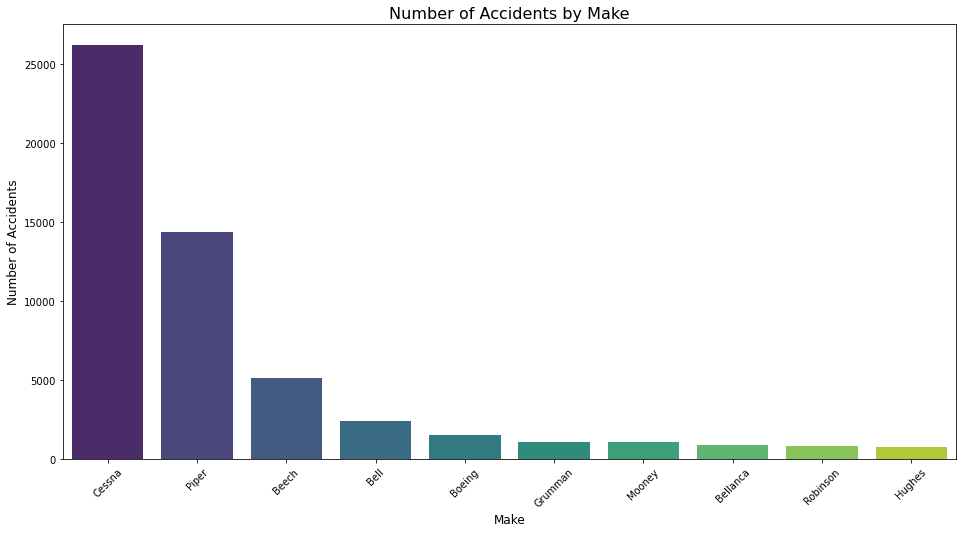

In [55]:
# Plot a bar chart
plt.figure(figsize=(16, 8))
sns.barplot(
    data=accident_counts_df.head(10),  # Top 10 aircraft types with the most accidents
    x='Make',
    y='Number of Accidents',
    palette='viridis'
)
plt.title('Number of Accidents by Make', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show();

### FINDINGS
1. The Aircraft company involved with most accidents is `Cessna`. It has a significantlly higher number of accidents compared to the other aircraft Companies.


2. Grumman, Mooney, Robinson, Bellanca and Hughes have the lowest accident counts from our plot, but this is just a representation of the top 10 aircraft companies in terms of number of accidents.

## 3. Weather Conditions and Accidents
Let's now investigate if the weather condition plays a significant role in causing aircraft accidents.

In [56]:
# Count of accidents by weather condition
weather_counts = aviation_df['Weather.Condition'].value_counts()
weather_counts

VMC    76691
IMC     5737
UNK      712
Unk      199
Name: Weather.Condition, dtype: int64

We need to clean the column so that we can have all instances when the weather was not known together.

In [57]:
# Use .replace()
clean_weather_column = aviation_df['Weather.Condition'].replace(['Unk'], ['UNK'])
clean_weather_column.value_counts()

VMC    76691
IMC     5737
UNK      911
Name: Weather.Condition, dtype: int64

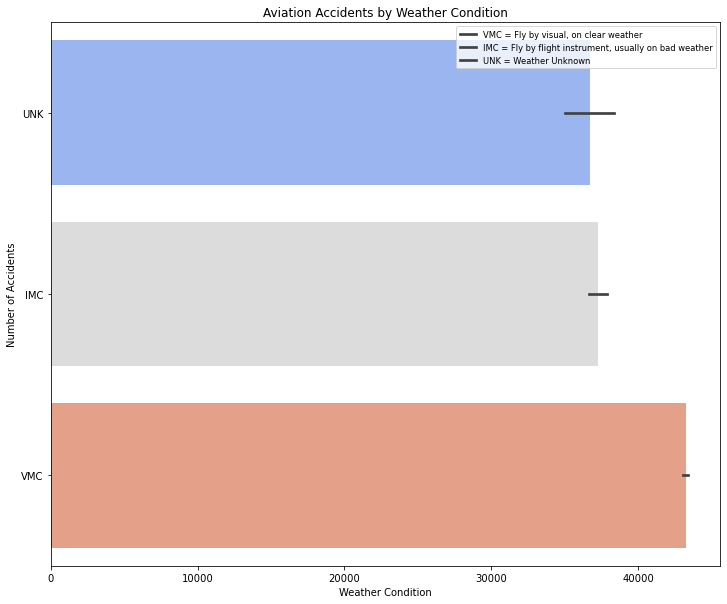

In [58]:
plt.figure(figsize=(12,10))
sns.barplot(x=clean_weather_column.index, y=clean_weather_column.values, palette='coolwarm')
plt.title('Aviation Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(['VMC = Fly by visual, on clear weather', 'IMC = Fly by flight instrument, usually on bad weather', 
            'UNK = Weather Unknown '], fontsize='small')
plt.show();

### FINDINGS
* From the above bar chart, most crashes happens in VMC, where weather is clear and pilot is flying by visual.
This implys that weather is not a significant factor causing accidents.

## 4. Accidents by Country
Identify which countries have the highest number of aviation accidents.

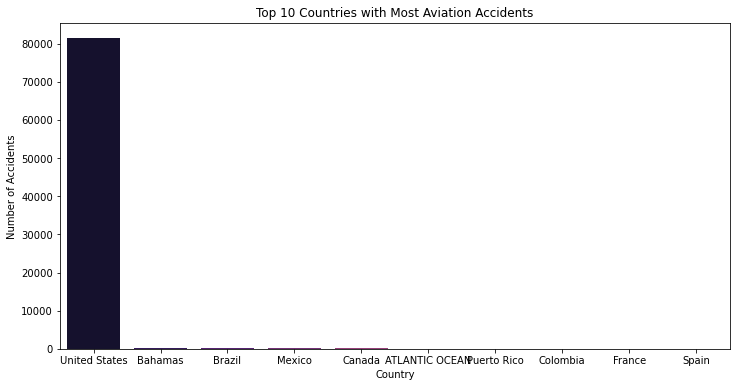

In [59]:
top_countries = aviation_df['Country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top 10 Countries with Most Aviation Accidents')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.show()

###  FINDINGS
* The United States has significantly high number of accidents compared to the rest of the countries

## OVERALL FINDINGS

1. The number of accidents is generally decreasing as the years go by.
2. The dataset seems to be missing information for the years 1962 to sometime in 1981.
3. The Aircraft company involved with most accidents is Cessna. It has a significantlly higher number of accidents compared to the other aircraft Companies.
4. The Aircraft company involved with most accidents is Cessna. It has a significantlly higher number of accidents compared to the other aircraft Companies.
5. The United States has significantly high number of accidents compared to the rest of the countries

## RECOMMENDATIONS
To be able to minimize risk in the new aviation division, i recommend;
1. Aircraft Particulars.
* Purchasing aircrafts of Makes that are associated with a low accident count. The Cessna make should be avoided, together with the other makes that have high counts. 
* The high accident rates in the years in the 90's could be associated with old aircraft models. We should consider purchasing newer models and equiping them with enhanced autopilot systems that can assist pilots during high-risk situations.
2. Setting aside a budget for pilot training programs. 
* The finding that most accidents occur during clear weather suggests that accidents could be caused by human error.
* Thorough training and awareness campaigns should be conducted for pilots to promote responsible flying and discourage risky behaviors. This will reinforce the importance of flying within established safety parameters which crucial in preventing accidents.
3. Areas of operations
* We should consider beginning operations in countries associated with low accident counts. Areas like the US which has the highest accident counts should be ventured into at a later time when the department is well established. 

## CONCLUSION

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***